In [1]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns


categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [2]:
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,"\nThey tried their best not to show it, believ..."
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...
2,\n[deletia- and so on]\n\nI seem to have been ...
3,"Excuse the sheer newbieness of this post, but ..."
4,==============================================...
...,...
3446,"\n Or, with no dictionary available, they cou..."
3447,\n\nSorry to disappoint you but the Red Wings ...
3448,\n: Can anyone tell me where to find a MPEG vi...
3449,\n


In [3]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [4]:
"""This utility function sanitizes a string by:
removing links
- removing special characters
- removing numbers
- removing stopwords
- transforming in lowercase
- removing excessive whitespaces
Args:
text (str): the input text you want to clean
remove_stopwords (bool): whether or not to remove stopwords
Returns:
str: the cleaned text
"""
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
        # return text in lowercase and stripped of whitespaces
    text = text.lower().strip()
    return text

In [5]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords = True))

In [6]:
df

,corpus,cleaned
0,"\nThey tried their best not to show it, believ...",tried best show believe im surprised couldnt f...
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...,stankiewicz doubt koufax one two jewish hofs h...
2,\n[deletia- and so on]\n\nI seem to have been ...,deletia seem rather unclear asking please show...
3,"Excuse the sheer newbieness of this post, but ...",excuse sheer newbieness post looking decent pa...
4,==============================================...,
...,...,...
3446,"\n Or, with no dictionary available, they cou...",dictionary available could gain first hand kno...
3447,\n\nSorry to disappoint you but the Red Wings ...,sorry disappoint red wings earned victoryeasil...
3448,\n: Can anyone tell me where to find a MPEG vi...,anyone tell find mpeg viewer either dos window...
3449,\n,


In [7]:
vectorizer = TfidfVectorizer(sublinear_tf = True, min_df=5,max_df=0.95)
X = vectorizer.fit_transform(df['cleaned'])
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12335099 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [8]:
# inizializziamo il kmeans con 3 centroidi
kmeans = KMeans(n_clusters=3, random_state=42)
# addestriamo il modello
kmeans.fit(X)
# salviamo i gruppi di ogni punto
clusters = kmeans.labels_
clusters

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 2, 0, 0], dtype=int32)

In [9]:
# inizializziamo la PCA con 2 componenti
pca = PCA(n_components=2, random_state=42)
# passiamo alla pca il nostro array X
pca_vecs = pca.fit_transform(X.toarray())
# salviamo le nostre due dimensioni in x0 e x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [15]:
x0

array([-0.0006744 ,  0.03096328,  0.06025638, ..., -0.17538199,
       -0.04020581,  0.07379699])

In [16]:
x1

array([ 0.00120312, -0.04397086,  0.08725381, ...,  0.05463447,
       -0.04461724, -0.09346332])

In [10]:
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [12]:
def get_top_keywords(n_terms):
    """Questa funzione restituisce le keyword per ogni centroide del KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # raggruppa il vettore TF-IDF per gruppo
    terms = vectorizer.get_feature_names_out() # accedi ai termini del tf idf
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # per ogni riga del dataframe, trova gli n termini che hanno il punteggio più alto
            
get_top_keywords(10)


Cluster 0
dont,like,last,games,think,would,year,one,team,game

Cluster 1
bible,believe,think,say,jesus,dont,one,would,people,god

Cluster 2
using,please,know,use,program,anyone,files,file,thanks,windows


In [13]:
# mappiamo cluster con termini adatti
cluster_map = {0: "sport", 1: "religione", 2: "tecnology"}
# applichiamo mappatura
df['cluster'] = df['cluster'].map(cluster_map)

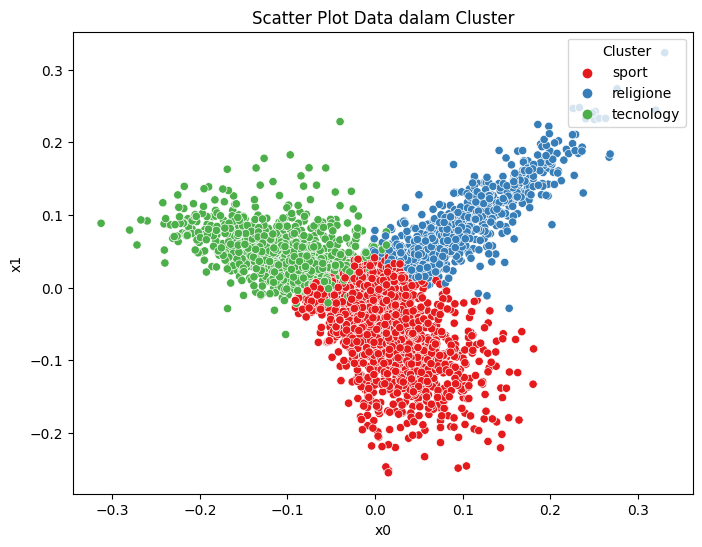

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['x0'], y=df['x1'], hue='cluster', palette='Set1')
plt.title('Scatter Plot Data dalam Cluster')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(title='Cluster', loc='upper right')
plt.show()